<a href="https://colab.research.google.com/github/Elma-dev/chest_xray_classification/blob/main/chest_xray_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Data From Kaggle

In [6]:
!pip install -q kaggle

In [7]:
from google.colab import files

In [8]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abdeljalilelmajjodi","key":"785057be942b0868b6d05241846e4e0e"}'}

In [9]:
!mkdir ~/.kaggle

In [10]:
!cp kaggle.json ~/.kaggle/

In [11]:
! chmod 600 ~/.kaggle/kaggle.json

In [12]:
!kaggle datasets list

ref                                                         title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/customer-shopping-trends-dataset          Customer Shopping Trends Dataset                   146KB  2023-10-05 06:45:37          12877        280  1.0              
asaniczka/top-spotify-songs-in-73-countries-daily-updated   Top Spotify Songs in 73 Countries (Daily Updated)    3MB  2023-10-28 23:47:05           1165         35  1.0              
nelgiriyewithana/billionaires-statistics-dataset            Billionaires Statistics Dataset (2023)             139KB  2023-09-29 13:39:28           6791        178  1.0              
zeesolver/consumer-behavior-and-shopping-habits-dataset     Consumer Behavior and Sho

In [13]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:16<00:00, 245MB/s]
100% 2.29G/2.29G [00:16<00:00, 149MB/s]


In [14]:
!unzip *.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

# Begining Of Projects

In [3]:
from fastai.vision.all import *
import matplotlib as plt
import plotly.express as px

In [15]:
data_path=Path("./chest_xray")
data_path

Path('chest_xray')

In [16]:
data_loads=ImageDataLoaders.from_folder(
    data_path,
    train="train",
    valid="val",
    item_tfms=RandomResizedCrop(224,min_scale=0.5),
    batch_tfms=aug_transforms(),
    bs=32,
    val_bs=32
)
#bs:batch size : 64
#"val_bs: None"

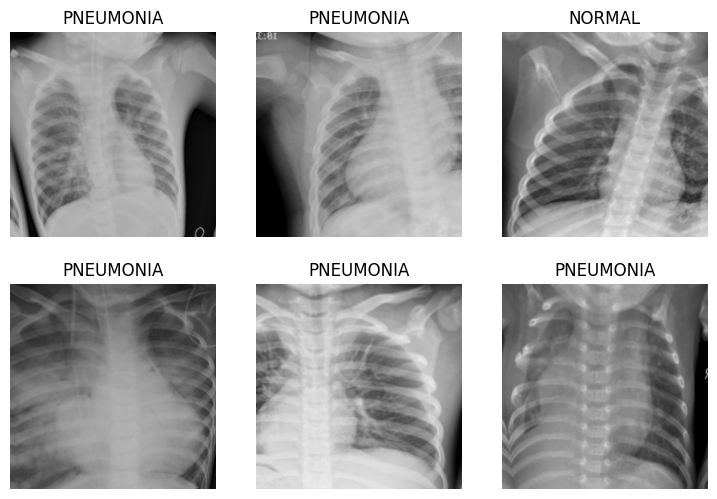

In [13]:
data_loads.train.show_batch(max_n=6)

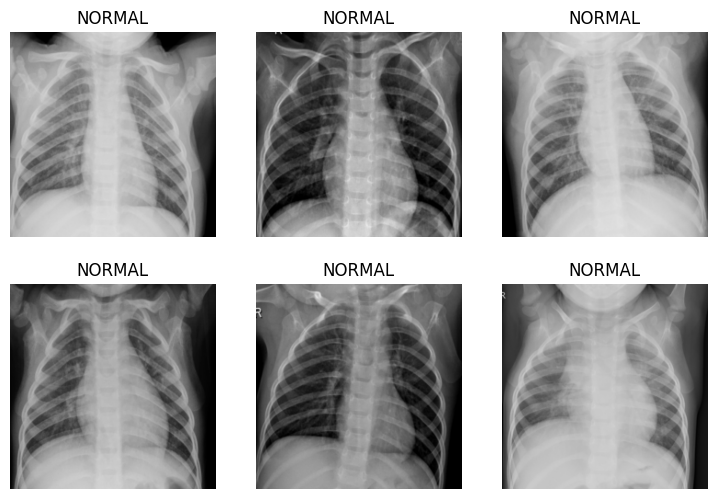

In [14]:
data_loads.valid.show_batch(max_n=6)

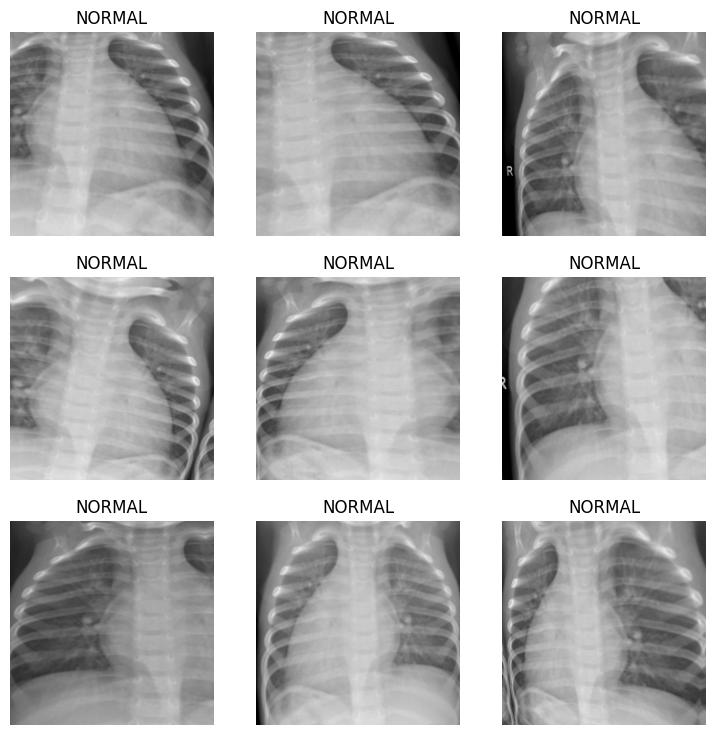

In [15]:
#Why batch_tfs ==> Data Augmentation
data_loads.train.show_batch(max_n=9,unique=True)

In [16]:
normal_train_size=len((data_path/"train"/"NORMAL").ls())
pneummnia_train_size=len((data_path/"train"/"PNEUMONIA").ls())

In [17]:
import pandas as pd
size=pd.DataFrame({"class":["Normal","PNEUMONIA"],"len":[normal_train_size,pneummnia_train_size]}).T

In [18]:
px.pie(size.T,values="len",names="class",title="Normal/PNEUMONIA Train Size")

In [19]:
train_size=len((data_path/"train"/"NORMAL").ls())+len((data_path/"train"/"PNEUMONIA").ls())
test_size=len((data_path/"test"/"NORMAL").ls())+len((data_path/"test"/"PNEUMONIA").ls())
valid_size=len((data_path/"val"/"NORMAL").ls())+len((data_path/"val"/"PNEUMONIA").ls())

In [20]:
splitSize=pd.DataFrame({"x":["train","test","valid"],"size":[train_size,test_size,valid_size]})
splitSize

,x,size
0,train,5216
1,test,624
2,valid,16


In [21]:
px.histogram(splitSize,x="x",y="size",text_auto=True,title="Size Of Spliting")

In [24]:
model=cnn_learner(data_loads,resnet34,metrics=error_rate)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning:

`cnn_learner` has been renamed to `vision_learner` -- please update your code

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 104MB/s]


In [25]:
model.fine_tune(20)

epoch,train_loss,valid_loss,error_rate,time
0,0.467657,0.940100,0.250000,01:20


epoch,train_loss,valid_loss,error_rate,time
0,0.269789,0.473664,0.187500,01:24
1,0.196343,0.468902,0.187500,01:22
2,0.186327,1.014116,0.375000,01:23
3,0.152535,0.740137,0.437500,01:21
4,0.139636,1.032750,0.500000,01:22
5,0.126552,0.239104,0.125000,01:21
6,0.134465,0.867816,0.500000,01:20
7,0.103844,0.603103,0.312500,01:20
8,0.110132,0.910959,0.375000,01:20
9,0.091214,0.282836,0.187500,01:21


In [26]:
clint=ClassificationInterpretation.from_learner(model)

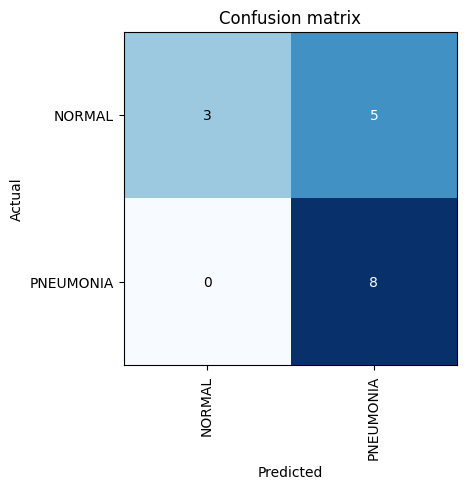

In [30]:
clint.plot_confusion_matrix()